# The United States Of America, Where are you safe ?
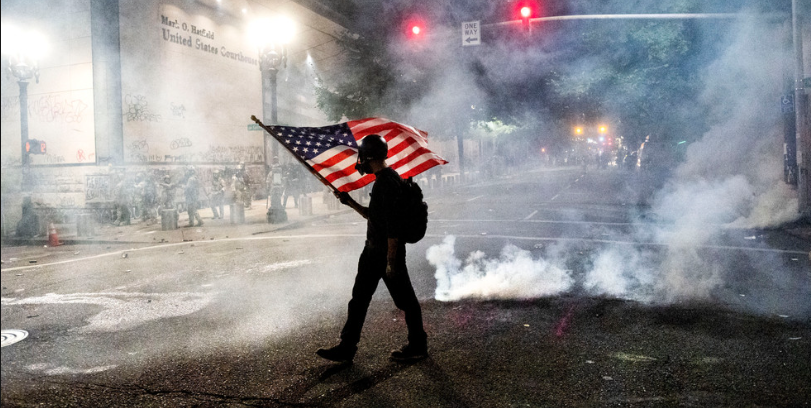
---



 ## Subject 

 We chose to study the crime activity in the USA. 
 We based our analysis on an dataset created by the media *The Marshall Project*.
 The dataframe can be found here : https://github.com/themarshallproject/city-crime/blob/master/data/ucr_crime_1975_2015.csv

In [ ]:
a = 4



# Questions

We grew up with a lot of americain action movies, filled with violence. New York as the headquarter of the italian mafia, Boston, home of a lot of criminal organization. But it is accurate ? Do theses cities are the most dangerous ? 

### The following cities will be studied : {{a}}


Importing Libraries 

*   For Data Manipulation: numpy, pandas
*   For Data Visualization: matplotlib, seaborn, plotly






In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tabulate import tabulate


# Data exploration 


In [ ]:
# About the Data set 

df_crime = pd.read_csv("ucr_crime_1975_2015.csv")
df_crime


,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
0,NM00101,1975,"Albuquerque, N.M.",286238.0,30.0,181.0,819.0,1353.0,2383.0,12.0,832.523984,10.480789,63.234092,286.125532,472.683571,NaN,NaN
1,TX22001,1975,"Arlington, Texas",112478.0,5.0,28.0,113.0,132.0,278.0,12.0,247.159445,4.445314,24.893757,100.464091,117.356283,NaN,NaN
2,GAAPD00,1975,Atlanta,490584.0,185.0,443.0,3887.0,3518.0,8033.0,12.0,1637.436198,37.710158,90.300540,792.320989,717.104512,NaN,NaN
3,CO00101,1975,"Aurora, Colo.",116656.0,7.0,44.0,171.0,389.0,611.0,12.0,523.762173,6.000549,37.717734,146.584831,333.459059,NaN,NaN
4,TX22701,1975,"Austin, Texas",300400.0,33.0,190.0,529.0,463.0,1215.0,12.0,404.460719,10.985353,63.249001,176.098535,154.127830,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,AZ01003,2015,"Tucson, Ariz.",529675.0,31.0,422.0,1059.0,1960.0,3472.0,NaN,655.496295,5.852645,79.671497,199.933922,370.038231,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crim...
2825,OK07205,2015,"Tulsa, Okla.",401520.0,55.0,365.0,854.0,2354.0,3628.0,NaN,903.566447,13.697948,90.904563,212.691771,586.272166,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crim...
2826,VA12800,2015,"Virginia Beach, Va.",452797.0,19.0,103.0,270.0,234.0,626.0,NaN,138.251799,4.196141,22.747501,59.629370,51.678788,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crim...
2827,DCMPD00,2015,"Washington, D.C.",672228.0,162.0,494.0,3404.0,4024.0,8084.0,NaN,1202.568176,24.098966,73.486972,506.375813,598.606425,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crim...


In [ ]:
# For the purpose of our analyzise we can drop the 2 last columns 
df_crime = df_crime.drop(columns=['source', 'url'])

In [ ]:
# a quick look of the variables 
print(df_crime.info())
df_crime.drop(columns=['year', 'ORI']).describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORI               2788 non-null   object 
 1   year              2829 non-null   int64  
 2   department_name   2829 non-null   object 
 3   total_pop         2760 non-null   float64
 4   homs_sum          2795 non-null   float64
 5   rape_sum          2754 non-null   float64
 6   rob_sum           2754 non-null   float64
 7   agg_ass_sum       2753 non-null   float64
 8   violent_crime     2794 non-null   float64
 9   months_reported   2692 non-null   float64
 10  violent_per_100k  2794 non-null   float64
 11  homs_per_100k     2795 non-null   float64
 12  rape_per_100k     2754 non-null   float64
 13  rob_per_100k      2754 non-null   float64
 14  agg_ass_per_100k  2753 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 331.6+ KB
None


,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k
count,2.760000e+03,2795.000000,2754.000000,2754.000000,2753.000000,2.794000e+03,2692.000000,2794.000000,2795.000000,2754.000000,2754.000000,2753.000000
mean,7.956981e+05,398.385331,416.278867,4000.245098,4405.146023,2.963255e+04,11.868871,1093.049952,15.372760,59.305140,459.968134,566.595538
std,1.012451e+06,2281.276402,479.811934,8653.902965,6977.293769,1.728630e+05,1.118194,676.884703,12.350651,31.971735,340.903545,369.437018
min,1.007630e+05,1.000000,15.000000,83.000000,15.000000,1.540000e+02,0.000000,16.494563,0.205464,1.640771,11.460508,1.606613
25%,3.779310e+05,32.000000,176.250000,1032.000000,1467.000000,3.014750e+03,12.000000,625.082639,6.955241,35.773523,210.245093,319.091928
50%,5.366145e+05,64.000000,291.000000,1940.000000,2597.000000,5.135500e+03,12.000000,949.676451,11.984468,55.900545,374.398220,487.484783
75%,8.168558e+05,131.000000,465.000000,3609.750000,4556.000000,9.058500e+03,12.000000,1409.508836,20.231759,77.795869,612.005983,728.238584
max,8.550861e+06,24703.000000,3899.000000,107475.000000,71030.000000,1.932274e+06,12.000000,4352.834209,94.735602,199.301908,2337.518708,2368.216602


In [ ]:
# Take a look at the number of NA values
df_crime.isna().sum()

ORI                  41
year                  0
department_name       0
total_pop            69
homs_sum             34
rape_sum             75
rob_sum              75
agg_ass_sum          76
violent_crime        35
months_reported     137
violent_per_100k     35
homs_per_100k        34
rape_per_100k        75
rob_per_100k         75
agg_ass_per_100k     76
dtype: int64

In [ ]:
# the cities studied 
print(len(df_crime["department_name"].unique()))
df_crime["department_name"].unique().tolist()


['Albuquerque, N.M.',
 'Arlington, Texas',
 'Atlanta',
 'Aurora, Colo.',
 'Austin, Texas',
 'Baltimore',
 'Baltimore County, Md.',
 'Boston',
 'Buffalo, N.Y.',
 'Charlotte-Mecklenburg, N.C.',
 'Chicago',
 'Cincinnati',
 'Cleveland',
 'Columbus, Ohio',
 'Dallas',
 'Denver',
 'Detroit',
 'El Paso, Texas',
 'Fairfax County, Va.',
 'Fort Worth, Texas',
 'Fresno, Calif.',
 'Honolulu',
 'Houston',
 'Indianapolis',
 'Jacksonville, Fla.',
 'Kansas City, Mo.',
 'Las Vegas',
 'Long Beach, Calif.',
 'Los Angeles',
 'Los Angeles County, Calif.',
 'Louisville, Ky.',
 'Memphis, Tenn.',
 'Mesa, Ariz.',
 'Miami',
 'Miami-Dade County, Fla.',
 'Milwaukee',
 'Minneapolis',
 'Montgomery County, Md.',
 'Nashville, Tenn.',
 'Nassau County, N.Y.',
 'National',
 'New Orleans',
 'New York City',
 'Newark, N.J.',
 'Oakland, Calif.',
 'Oklahoma City',
 'Omaha, Neb.',
 'Orlando, Fla.',
 'Philadelphia',
 'Phoenix',
 'Pittsburgh',
 'Portland, Ore.',
 "Prince George's County, Md.",
 'Raleigh, N.C.',
 'Sacramento, Ca

# Data Vizualisation 


Question we may be curious 